# Predicción de Consumo Energético
---
**Autores:**  
- Costela Guijosa, Jose Luis  
- Sanchez Jimenez, Manuel  

**Fecha:**  
Enero de 2025

**Descripción:**  
Predicción de consumo energético.

**Contacto:**  
- joscosgui@alum.us.es  
- mansanjim1@alum.us.es
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('Data/Energy_consumption_dataset.csv')

---
Se realiza un análisis preliminar del dataframe para identificar los tipos de variables presentes en sus atributos

In [2]:
print("Información del dataframe:")
print(df.info(), "\n")

print("Primeras instancias del dataframe:")
print(df.head(), "\n")

print("Descripcion del dataframe:")
print(df.describe())

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None 

Primeras instancias del dataframe:
   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     

---
Se realiza una pequeña consulta por si existe algún dato faltante

In [3]:
print("Se revisa si existe algún dato faltante")
print(df.isnull().sum()) # Se comprueba que no existe ningún dato faltante
print("Observando las metricas anteriores se observa que no hay datos faltantes")

Se revisa si existe algún dato faltante
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64
Observando las metricas anteriores se observa que no hay datos faltantes


------------------------------------
## Histograma de energia consumida.
A través de este histograma se observa como los datos de consumo eléctrico siguen una distribución similar
a una distribución normal centrada en un rango de 75 a 80 unidades.

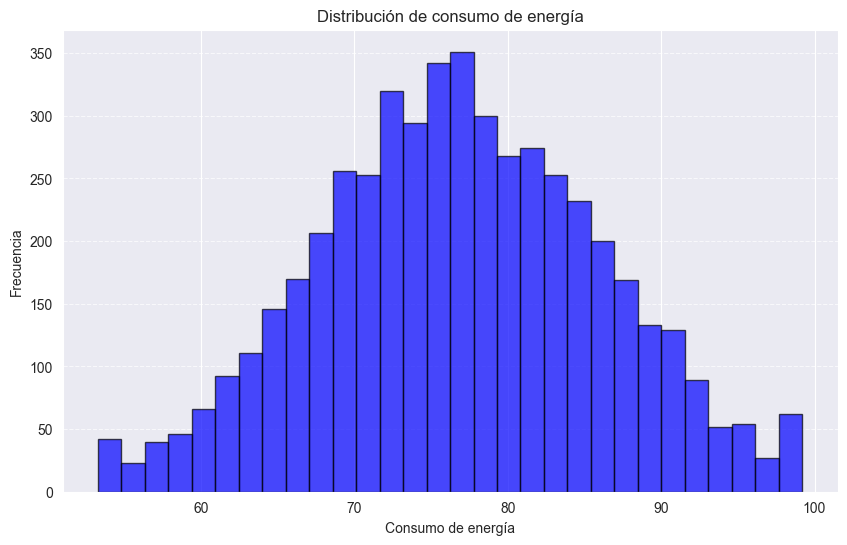

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['EnergyConsumption'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de consumo de energía')
plt.xlabel('Consumo de energía')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

---
## Consumo horario en vacaciones y no-vacaciones 

En días festivos, el consumo energético presenta un comportamiento más irregular, con picos durante la noche y una estructura diaria menos definida, lo que refleja horarios más flexibles. Por otro lado, en los días no festivos, se observan patrones más estructurados, con aumentos en horas laborales y de la tarde, mostrando rutinas más marcadas.

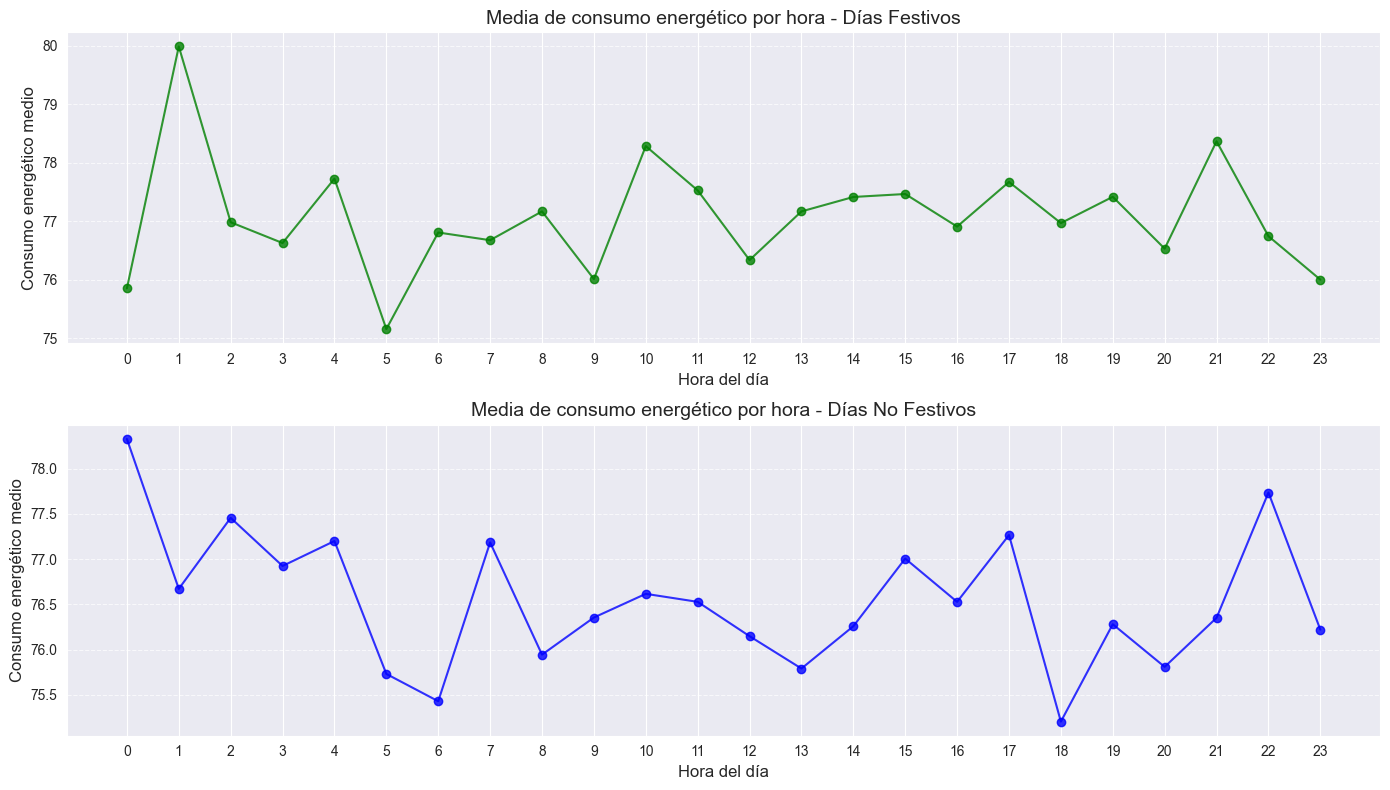

In [5]:
df_holiday = df[df['Holiday'] == 'Yes']
df_non_holiday = df[df['Holiday'] == 'No']

df_hourly_energy_holiday = df_holiday.groupby('Hour')['EnergyConsumption'].mean()
df_hourly_energy_non_holiday = df_non_holiday.groupby('Hour')['EnergyConsumption'].mean()

# Días festivos
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(df_hourly_energy_holiday.index, df_hourly_energy_holiday.values, marker='o', linestyle='-', color='green', alpha=0.8)
plt.title('Media de consumo energético por hora - Días Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Días no festivos
plt.subplot(2, 1, 2)
plt.plot(df_hourly_energy_non_holiday.index, df_hourly_energy_non_holiday.values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title('Media de consumo energético por hora - Días No Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

---
## Consumo en los distintos dias de la semana

Durante los dias de la semana el consumo energético es regular.

DayOfWeek
Friday       77.103561
Monday       76.171877
Saturday     77.325581
Sunday       76.578337
Thursday     76.454205
Tuesday      77.210683
Wednesday    76.684472
Name: EnergyConsumption, dtype: float64
DayOfWeek
Monday       76.171877
Tuesday      77.210683
Wednesday    76.684472
Thursday     76.454205
Friday       77.103561
Saturday     77.325581
Sunday       76.578337
Name: EnergyConsumption, dtype: float64


/var/folders/3f/kkqj_rh14mj7009wp06l78r40000gn/T/ipykernel_86026/2547528022.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')


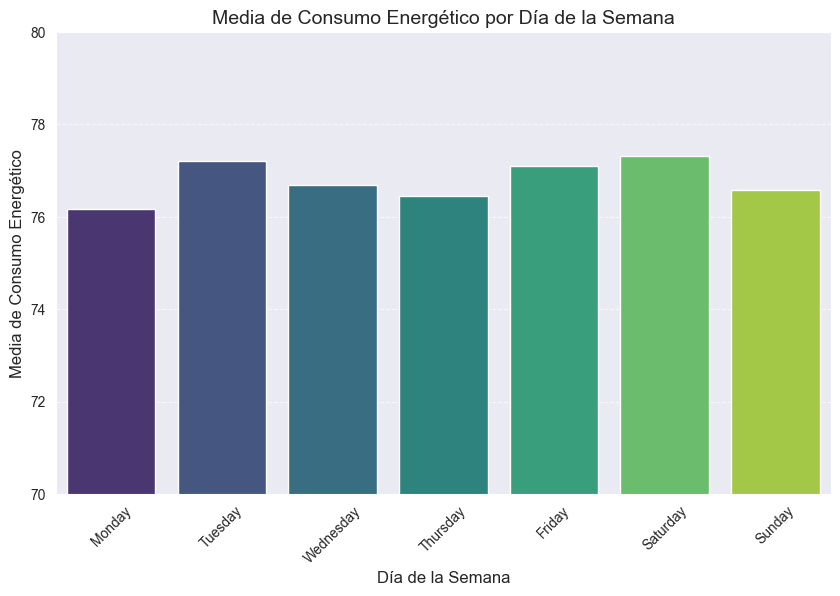

In [6]:
mean_consumption_by_day = df.groupby('DayOfWeek')['EnergyConsumption'].mean()
print(mean_consumption_by_day)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_consumption_by_day = mean_consumption_by_day.reindex(ordered_days)
print(mean_consumption_by_day)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')
plt.title('Media de Consumo Energético por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


---
## Consumo en las distintas estaciones del año

In [7]:
def get_season(month):
    if month in [12, 1, 2]:  # Invierno
        return 'Invierno'
    elif month in [3, 4, 5]:  # Primavera
        return 'Primavera'
    elif month in [6, 7, 8]:  # Verano
        return 'Verano'
    elif month in [9, 10, 11]:  # Otoño
        return 'Otoño'

/var/folders/3f/kkqj_rh14mj7009wp06l78r40000gn/T/ipykernel_86026/672728715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')


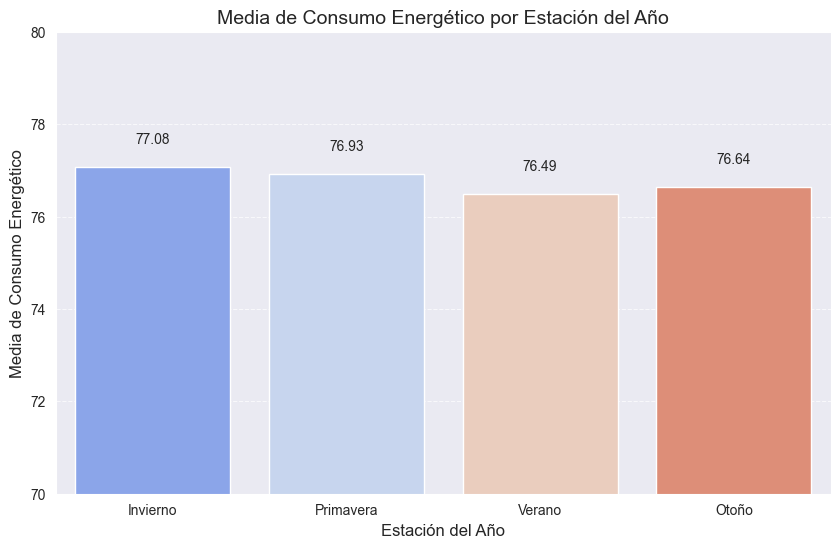

In [8]:
df['season'] = df['Month'].apply(get_season)

mean_consumption_by_season = df.groupby('season')['EnergyConsumption'].mean()

ordered_seasons = ['Invierno', 'Primavera', 'Verano', 'Otoño']
mean_consumption_by_season = mean_consumption_by_season.reindex(ordered_seasons)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')
plt.title('Media de Consumo Energético por Estación del Año', fontsize=14)
plt.xlabel('Estación del Año', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)

for index, value in enumerate(mean_consumption_by_season.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

---
# mrRM

Convertir las variables categóricas a numéricas

In [9]:
df['Holiday'] = df['Holiday'].map({'No': 0, 'Yes': 1})
df['DayOfWeek'] = df['DayOfWeek'].map({
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})
df['HVACUsage'] = df['HVACUsage'].map({'Off': 0, 'On': 1})
df['LightingUsage'] = df['LightingUsage'].map({'Off': 0, 'On': 1})

print("Información del dataframe con la conversion de los datos realizados:")
print(df.info(), "\n")
print(df.head())

Información del dataframe con la conversion de los datos realizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   int64  
 3   Holiday            5000 non-null   int64  
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   int64  
 9   LightingUsage      5000 non-null   int64  
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
 12  season             5000 non-null   object 
dtypes: float64(5), int64(7), object(1)
memory usage: 507.9+ KB
None 

   Month  Hour  DayOfWeek  Holida

Normalizacion

In [10]:
columns_to_exclude = ['Month', 'Hour', 'DayOfWeek', 'Holiday','HVACUsage','season','Occupancy']
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(columns_to_exclude)

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

target_column = 'EnergyConsumption'
X = df.drop(columns=[target_column])
y = df[target_column]

Aplicar mrMR

In [ ]:
# Seleccionar solo características numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

df_encoded = numerical_df[['EnergyConsumption'] + [col for col in numerical_df.columns if col != 'EnergyConsumption']]

# Aplicar mRMR
selected_features = pymrmr.mRMR(df_encoded, 'MIQ', 11) 

print("Características seleccionadas por mRMR:", selected_features)

Se proceden a ordenar los atributos del dataset en orden de mayor relevancia de la variable a menor relevancia, de forma que sea más sencillo trabajar con este a lo largo del proyecto

In [11]:
# Lista de características seleccionadas por mRMR
selected_features = ['SquareFootage', 'Temperature', 'RenewableEnergy', 'Humidity', 'Hour', 'Occupancy', 'HVACUsage', 'Month', 'LightingUsage', 'DayOfWeek', 'Holiday']

# Añadir la columna objetivo 'EnergyConsumption' al principio de la lista
ordered_features = ['EnergyConsumption'] + selected_features

# Reordenar el DataFrame
df_ordered = df[ordered_features]

# Mostrar las primeras filas del DataFrame ordenado
print(df_ordered.head())

   EnergyConsumption  SquareFootage  Temperature  RenewableEnergy  Humidity  \
0           0.481109       0.565481     0.513644         0.092396  0.447887   
1           0.656073       0.410770     0.773096         0.728495  0.808261   
2           0.544379       0.755603     0.870445         0.225578  0.964564   
3           0.070891       0.452043     0.007297         0.287623  0.679584   
4           0.382004       0.093667     0.309254         0.102318  0.713964   

   Hour  Occupancy  HVACUsage  Month  LightingUsage  DayOfWeek  Holiday  
0     0          5          1      1            0.0          5        0  
1     1          1          1      1            1.0          5        0  
2     2          2          0      1            0.0          5        0  
3     3          1          0      1            1.0          5        0  
4     4          9          1      1            0.0          5        0  


---
# División del algoritmo en entrenamiento - test

In [12]:
# Dividir el dataset <X, y> en dos datasets <X_train, y_train> y <X_test, y_test> con una distribución 80%-20%,
# entrenar el clasificador con <X_train, y_train> y calcular la métrica accuracy con <X_test, y_test>

X=df_ordered.drop(columns=['EnergyConsumption'])
Y=df_ordered['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

print("X_train", X_train)
print("X_test", X_test)
print("y_train", y_train)
print("y_test", y_test)

X_train       SquareFootage  Temperature  RenewableEnergy      Humidity  Hour  \
2913       0.630966     0.776128         0.477029  1.657722e-08     3   
3275       0.563026     0.656075         0.585470  1.000000e+00    13   
775        0.872911     0.007904         0.563082  7.193622e-01     7   
217        0.979940     0.114286         0.548672  7.101341e-01     1   
1245       0.246247     0.224889         0.736403  8.183611e-01    16   
...             ...          ...              ...           ...   ...   
4931       0.456867     0.532933         0.542976  8.085576e-01    17   
3264       0.149549     0.311689         0.235813  8.266339e-01    10   
1653       0.934922     0.041619         0.856791  9.618944e-02    15   
2607       0.456982     0.168424         0.355191  6.933141e-01    14   
2732       0.724297     0.389222         0.238683  4.041265e-01    17   

      Occupancy  HVACUsage  Month  LightingUsage  DayOfWeek  Holiday  
2913          6          1      7           

---
# Algoritmos de predicción



Regresión lineal

In [13]:
# Crear el modelo de Regresión Lineal
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal - MSE:", mse_lr)
print("Regresión Lineal - R²:", r2_lr)

Regresión Lineal - MSE: 0.027588523864176245
Regresión Lineal - R²: 0.3327100204478475


DecisionTree

In [14]:
# Crear el modelo de Árbol de Decisión
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
model_tree.fit(X_train, y_train)

# Hacer predicciones
y_pred_tree = model_tree.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árbol de Decisión - MSE:", mse_tree)
print("Árbol de Decisión - R²:", r2_tree)

# Ajuste de hiperparámetro
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],  
    'min_samples_split': [2, 5, 10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

# Crear el modelo de Árbol de Decisión
model_tree = DecisionTreeRegressor(max_depth=3, min_samples_split=10, random_state=42)

# Entrenar el modelo
model_tree.fit(X_train, y_train)

# Hacer predicciones
y_pred_tree = model_tree.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árbol de Decisión - MSE:", mse_tree)
print("Árbol de Decisión - R²:", r2_tree)

Árbol de Decisión - MSE: 0.02967080185665467
Árbol de Decisión - R²: 0.2823454831546046
Mejores hiperparámetros: {'max_depth': 3, 'min_samples_split': 2}
Árbol de Decisión - MSE: 0.029625736204167197
Árbol de Decisión - R²: 0.2834354964686522


KNeighborsRegressor

In [16]:
# Optimización de hiperparámetros para KNN
param_grid_knn = {'n_neighbors': [3, 5, 10, 15, 20], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros para KNN:", grid_search_knn.best_params_)

# Crear modelo KNN con los mejores hiperparámetros obtenidos a través del GridSearchCV
best_params = grid_search_knn.best_params_
model_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], p=best_params['p'], weights=best_params['weights'])

model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN - MSE:", mse_knn)
print("KNN - R²:", r2_knn)

Mejores hiperparámetros para KNN: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
KNN - MSE: 0.038094933397980736
KNN - R²: 0.07858907372758794


Grafico con la comparativa entre los distintos modelos de regresion

In [ ]:
# Visualización de métricas
models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN']
mse_values = [mse_lr, mse_tree, mse_knn]
r2_values = [r2_lr, r2_tree, r2_knn]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, alpha=0.7, label='R²')
plt.plot(models, mse_values, color='red', marker='o', label='MSE')
plt.title('Comparación de MSE y R² entre modelos')
plt.ylabel('Valor')
plt.legend()
plt.show()
